<a href="https://colab.research.google.com/github/Pranavesh-Panakkal/CEVE-562-Python-demo/blob/main/Notebook_4_Network_and_Spatial_Analyses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 4: Network and Spatial Analyses

### Topics
-  Network analysis
-  Spatial analysis and GIS
-  Uncertainity analysis

# 1. Network Analysis

A Python library for network analysis

## 2a. NetworkX

In [63]:
import networkx as nx
import matplotlib.pyplot as plt

b. Creating a network

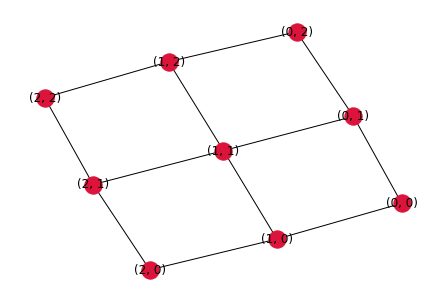

In [66]:
# Generate a 3x3 grid network
G = nx.grid_2d_graph(3,3)

# Plot the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels = True, node_color='crimson')

c. Connectivity

In [67]:
# Estimate the shortest distance from node (2,0) to node (1, 2)
start_node = (2,0)
end_node = (1,2)

path = nx.shortest_path(G=G, source=start_node, target=end_node)
path_length = nx.shortest_path_length(G=G, source=start_node, target=end_node)

print(f'Shortest path: {path}, \nShortest path length: {path_length}')

Shortest path: [(2, 0), (1, 0), (1, 1), (1, 2)], 
Shortest path length: 3


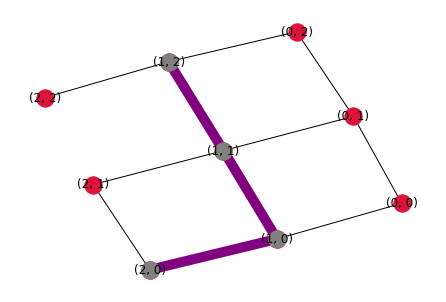

In [71]:
# Plot the shortest path
# Get path edges
path_edges = list(zip(path,path[1:]))
# Draw the path
nx.draw(G, pos, with_labels = True, node_color='crimson')
# Draw nodes along the shortest path
nx.draw_networkx_nodes(G, pos, nodelist=path,node_color='grey')
# Draw the shoutest path
nx.draw_networkx_edges(G, pos, edgelist=path_edges,edge_color='purple',width=10)
plt.show()

d. Simulate flooding

In [72]:
# Assume that the three links are flooded.
flooded_links = [((2,1), (2,2)), 
                 ((1,1), (1,2))]
G.remove_edges_from(flooded_links)

e. Modified network

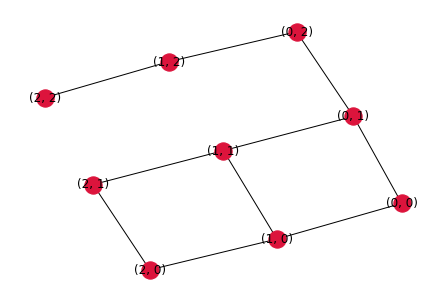

In [73]:
nx.draw(G, pos, with_labels = True, node_color='crimson')

f. Update network condition

In [74]:
path = nx.shortest_path(G=G, source=start_node, target=end_node)
path_length = nx.shortest_path_length(G=G, source=start_node, target=end_node)

print(f'Shortest path: {path}, \nShortest path length: {path_length}')

Shortest path: [(2, 0), (1, 0), (0, 0), (0, 1), (0, 2), (1, 2)], 
Shortest path length: 5


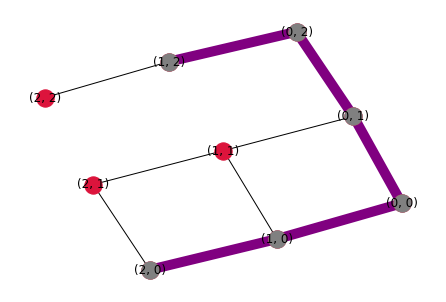

In [75]:
# Plot the shortest path
# Get path edges
path_edges = list(zip(path,path[1:]))
# Draw the path
nx.draw(G, pos, with_labels = True, node_color='crimson')
# Draw nodes along the shortest path
nx.draw_networkx_nodes(G, pos, nodelist=path,node_color='grey')
# Draw the shoutest path
nx.draw_networkx_edges(G, pos, edgelist=path_edges,edge_color='purple',width=10)
plt.show()

# 2. GeoPandas

A python library for geospatial analysis

In [77]:
!pip install geopandas -q
!pip install mapclassify -q
!pip install rtree

## 2a. Importing GeoPandas

In [78]:
import geopandas as gpd

## 2b. Loading geodata

In [79]:
# Get paths to datasets
# This example is based on https://geopandas.org/en/stable/gallery/plot_clip.html
path_cities = gpd.datasets.get_path("naturalearth_cities")
path_world_map = gpd.datasets.get_path("naturalearth_lowres")

In [80]:
path_cities, path_world_map

('/usr/local/lib/python3.7/dist-packages/geopandas/datasets/naturalearth_cities/naturalearth_cities.shp',
 '/usr/local/lib/python3.7/dist-packages/geopandas/datasets/naturalearth_lowres/naturalearth_lowres.shp')

In [81]:
world_capital = gpd.read_file(path_cities)
world = gpd.read_file(path_world_map)

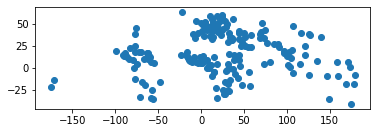

In [82]:
world_capital.plot();

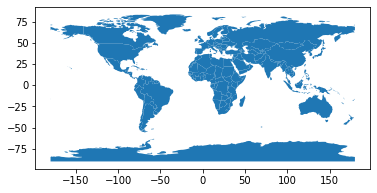

In [83]:
world.plot();

## 2c. Data exploration

In [84]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [86]:
world_capital

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)
...,...,...
197,Cairo,POINT (31.24802 30.05191)
198,Tokyo,POINT (139.74946 35.68696)
199,Paris,POINT (2.33139 48.86864)
200,Santiago,POINT (-70.66899 -33.44807)


## 2d. Filtering data

In [87]:
data_north_america = world[world['continent']=='North America']
data_north_america

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
16,10646714,North America,Haiti,HTI,19340.0,"POLYGON ((-71.71236 19.71446, -71.62487 19.169..."
17,10734247,North America,Dominican Rep.,DOM,161900.0,"POLYGON ((-71.70830 18.04500, -71.68774 18.316..."
19,329988,North America,Bahamas,BHS,9066.0,"MULTIPOLYGON (((-78.98000 26.79000, -78.51000 ..."
22,57713,North America,Greenland,GRL,2173.0,"POLYGON ((-46.76379 82.62796, -43.40644 83.225..."
27,124574795,North America,Mexico,MEX,2307000.0,"POLYGON ((-117.12776 32.53534, -115.99135 32.6..."
33,3753142,North America,Panama,PAN,93120.0,"POLYGON ((-77.35336 8.67050, -77.47472 8.52429..."
34,4930258,North America,Costa Rica,CRI,79260.0,"POLYGON ((-82.54620 9.56613, -82.93289 9.47681..."
35,6025951,North America,Nicaragua,NIC,33550.0,"POLYGON ((-83.65561 10.93876, -83.89505 10.726..."


## 2e. More plotting

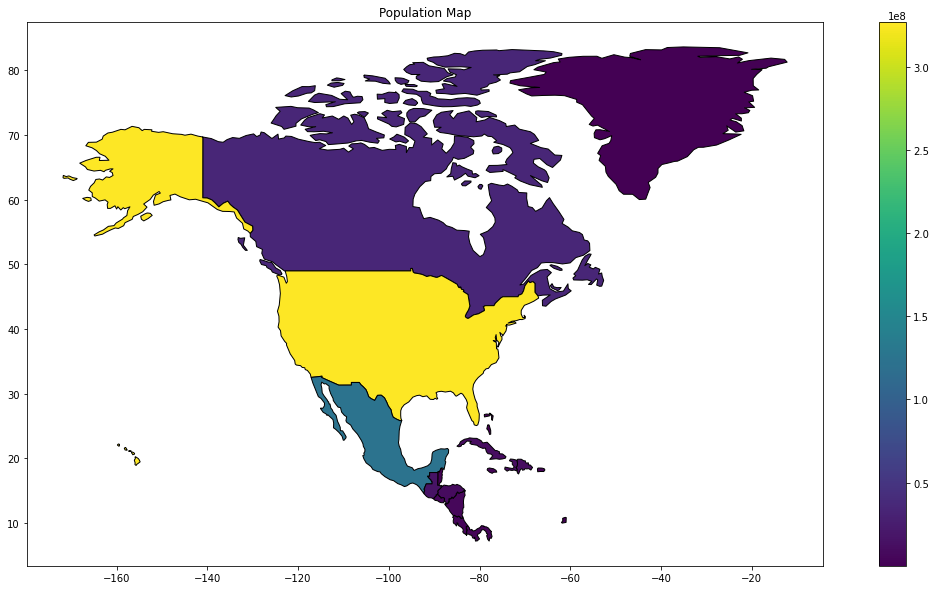

In [89]:
data_north_america.plot(column='pop_est', edgecolor='k', legend=True, figsize=(20,10));
plt.title('Population Map');


e. GIS Operations - Clipping

In [45]:
north_american_capitals = world_capital.clip(data_north_america)

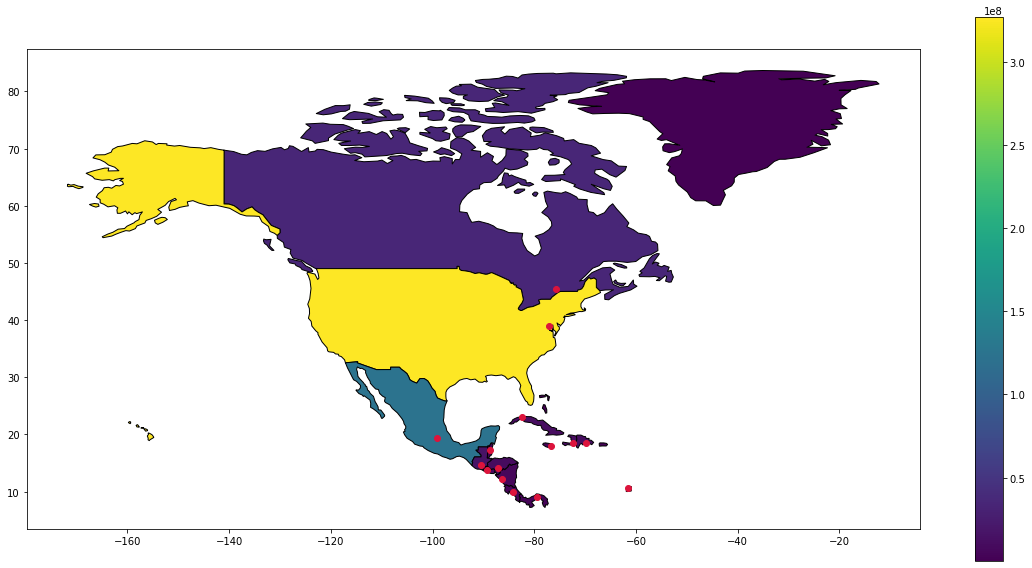

In [93]:
fig, ax = plt.subplots(figsize=(20,10))
# data_north_america.plot(column='pop_est', scheme='quantiles', k=10, edgecolor='k', legend=True, ax=ax);
data_north_america.plot(column='pop_est', edgecolor='k', legend=True, ax=ax);
north_american_capitals.plot(ax=ax, color='crimson');

# 3. Uncertainity Analysis

## 3a. UQpy - Uncertainty quantification with Python 

In [94]:
!pip install UQpy -q

In [95]:
from UQpy.SampleMethods import LHS
# This example is from https://github.com/SURGroup/UQpy/blob/master/example/SampleMethods/LHS/LHS_Example1.ipynb

In [96]:
from UQpy.Distributions import Uniform
dist1 = Uniform(loc=0., scale=1.)
dist2 = Uniform(loc=0., scale=1.)

UQpy: Running Latin Hypercube sampling...
Successful execution of LHS design.


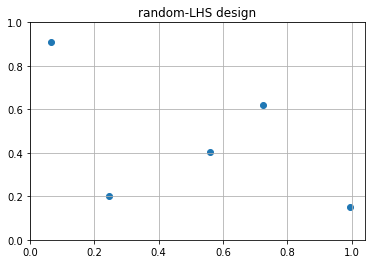

In [97]:
x1c = LHS(dist_object=[dist1, dist2], nsamples=5, random_state=np.random.RandomState(789), verbose=True)

fig, ax = plt.subplots()
plt.title('random-LHS design')
plt.scatter(x1c.samples[:, 0], x1c.samples[:, 1])
ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

# Resources

---
*   [Python](https://www.python.org/)
*   [Numpy](https://numpy.org/)
*   [GeoPandas](https://geopandas.org/en/stable/)
*   [NetworkX](https://networkx.org/)
*   [Matplotlib](https://matplotlib.org/stable/)
*   [Pandas](https://pandas.pydata.org/)
*   [UQpy](https://uqpyproject.readthedocs.io/en/latest/)